    no bonus

add point, connect to H hull nodes, creating regions

define volume of region
define cost as difference between volumes and total volume / N
if H < N, for H-N, cost is volume

use multi variate gradient descent to minimize cost

if total cost = 0 at minimum, return point
else try N-1

    bonus
generalise space_volume (using matrix determinants?)

    bonus++
linear programming?

In [569]:
inx = '3 \n(0 0)(0 1)(1 1)(1 0)\n(1 2)(2 3)(3 4)(4 1)'
iny = '5\n(1 0)(0 1)(0 2)(1 3)(2 1)\n(1 2)(2 3)(3 4)(4 5)(5 1)'

3 
(0 0)(0 1)(1 1)(1 0)
(1 2)(2 3)(3 4)(4 1)


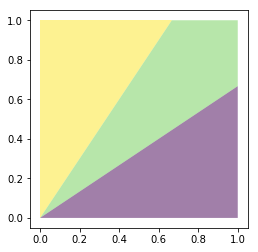

In [574]:
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

def prep_data(inx):
    print(inx)
    a = inx.replace(')',';').replace('(','').split('\n')
    regions = int(a[0])
    nodes = [[float(y) for y in x.split(' ') if y] for x in a[1].split(';') if x]
    return regions,np.array(nodes)

def volume(triangle):
    b = triangle[1:] - triangle[0]
    return abs(np.linalg.det(b))/2

def total_volume(nodes):
    first = nodes[0]
    total = 0
    for x,y in zip(nodes[1:],nodes[2:]):
        total += volume((x,y,first))
    return total

def n_sect_2D(nodes,regions,region_v):
    first = nodes[0]
    a = nodes[1]
    b = nodes[2]
    c = 2
    added = []
    regionx = []
    while regions:
        region = [first,a]
        vol = volume((first,a,b)) 
        tot = vol
        while tot < region_v: 
            c += 1
            vol = volume((first,b,nodes[c]))
            tot += vol
            region.append(b)
            a,b = b,nodes[c]
        share = (region_v - tot + vol) /vol
        a = a*(1-share) + b*share
        region.append(a)
        added.append(a)
        regionx.append(region)
        regions -= 1
    return added,regionx

def do(inx):
    regions,nodes = prep_data(inx)
    total = total_volume(nodes)
    region_v = total/regions
    solution,regionx = n_sect_2D(nodes,regions,region_v)
    return regionx

def plot_regions(regionx):
    fig, ax = plt.subplots()
    patches = []
    for i in regionx:
        polygon = Polygon(i, True)
        patches.append(polygon)
    colors = 50*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.5)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    plt.axis('scaled')
    plt.show()
    
plot_regions(do(inx))

5
(1 0)(0 1)(0 2)(1 3)(2 1)
(1 2)(2 3)(3 4)(4 5)(5 1)


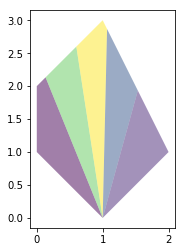

In [578]:
plot_regions(do(iny))